# 📺 Netflix Data Analysis

A beginner-level exploratory data analysis (EDA) project using the Netflix Movies and TV Shows dataset from Kaggle. The project explores patterns in content type, release trends, countries, ratings, and durations.


In [2]:
## 1. 🛠️ Import Libraries & Load Data

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/netflix_titles.csv")

In [4]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape
#12 columns

(8807, 12)

In [7]:
## 2. 🧹 Data Cleaning

In [8]:
#Checking how much values are missing
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
#dropping rows with missing values
df.dropna(inplace=True)

In [10]:
#reset the index of the rows
df.reset_index(drop=True,inplace=True)

In [11]:
## 3. 🔍 Exploratory Data Analysis

In [12]:
df["type"].value_counts()
#5185 movies and 147 TV shows

,count
type,
Movie,5185
TV Show,147


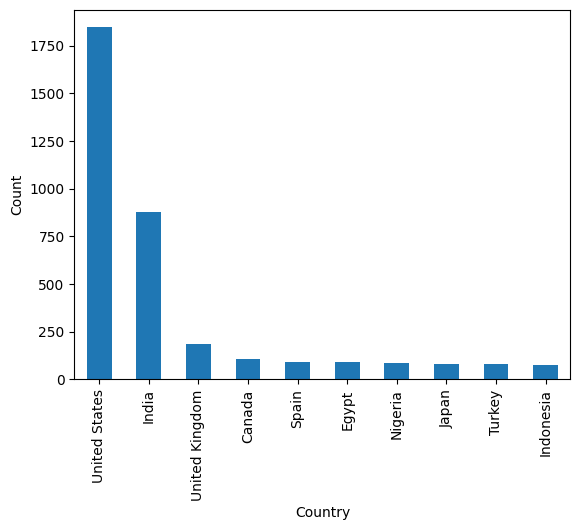

In [29]:
df["country"].value_counts().head(10).plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()
#Top 10 countries with the highest number of movies/tv shows

In [14]:
df["month"] = pd.to_datetime(df["date_added"], format="mixed").dt.month

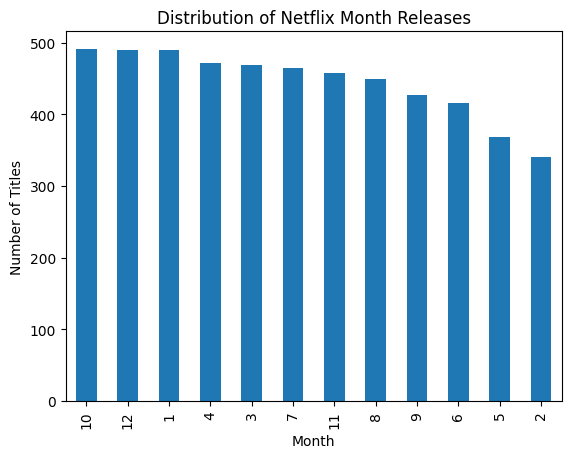

In [28]:
df["month"].value_counts().plot(kind="bar")
plt.title("Distribution of Netflix Month Releases")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()
#The months Netflix adds movies/tv shows are pretty close with some single digit difference. The month with the highest number of releases is October followed by december.

<Axes: ylabel='count'>

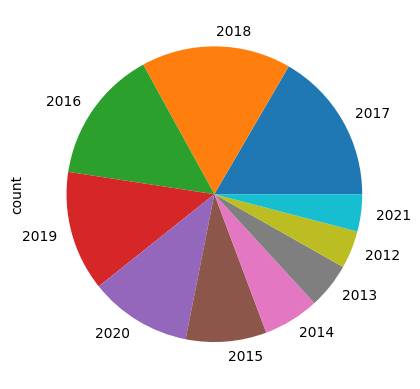

In [16]:
df["release_year"].value_counts().head(10).plot(kind="pie")
#The year 2017 has the highest number of movies/tv shows

In [17]:
df["director"].value_counts().head(10)
#Top 10 frequent directors

,count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12
Jay Chapman,12
Steven Spielberg,11
Don Michael Paul,10


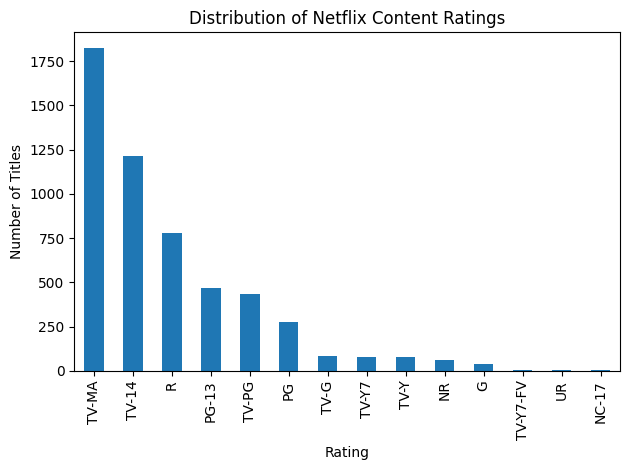

In [25]:
df["rating"].value_counts().plot(kind="bar")
plt.title("Distribution of Netflix Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.show()
#Rating of "TV-MA" is the most common

In [19]:
df.groupby("type")["rating"].value_counts()
#checking what type of rating is most common in movies and TV Shows

type     rating  
Movie    TV-MA       1741
         TV-14       1177
         R            778
         PG-13        470
         TV-PG        416
         PG           275
         TV-G          81
         TV-Y          71
         TV-Y7         70
         NR            58
         G             40
         TV-Y7-FV       3
         UR             3
         NC-17          2
TV Show  TV-MA         81
         TV-14         37
         TV-PG         15
         TV-Y7          6
         TV-Y           5
         TV-G           3
Name: count, dtype: int64

In [20]:
#What is the typical length of a movie on netflix
df[df["type"] == "Movie"]["duration"].value_counts().head(5)

,count
duration,
94 min,135
93 min,130
97 min,129
95 min,127
90 min,123


In [21]:
#How about tv shows
df[df["type"] == "TV Show"]["duration"].value_counts().head(5)
#Most tv shows only have a season

,count
duration,
1 Season,106
2 Seasons,18
5 Seasons,6
4 Seasons,4
9 Seasons,3
